In [1]:
# Naive Bayes Amazon Baby Review

import pandas as pd
import numpy as np
import nltk
import string
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.corpus import stopwords
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [2]:
#reading reviews using pandas library from amazon_baby_train.csv file
reviews = pd.read_csv('amazon_baby_train.csv')
reviews.shape

# dropping observations which are incomplete
reviews = reviews.dropna()
reviews.shape

# changing the reviews into positive and negative reviews
scores = reviews['rating']
reviews['rating'] = reviews['rating'].apply(lambda x: 1 if x > 3 else 0)

# printing the mean and standard deviation of ratings
print("The Mean of the Review Attribute is : ")
print(scores.mean())
print("The Standard Deviation of the Review Attribute is : ")
print(scores.std())

The Mean of the Review Attribute is : 
0.7642793999739596
The Standard Deviation of the Review Attribute is : 
0.4244498007103935


In [3]:
#grouping the reviews into positive and negative
reviews.groupby('rating')['review'].count()

rating
0     34398
1    111529
Name: review, dtype: int64

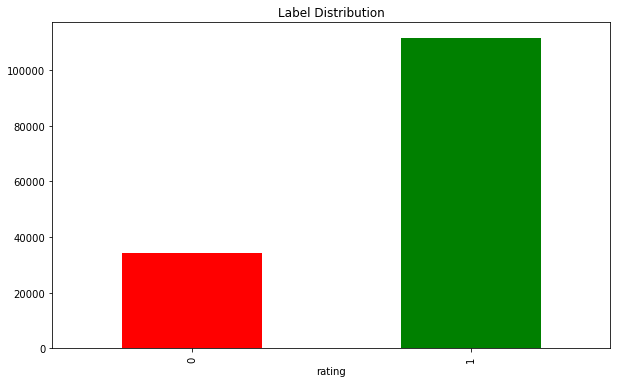

In [4]:
# plotting a graph which counts the number of positive and negative labels
reviews.groupby('rating')['review'].count().plot(kind='bar', color= ['r','g'],title='Label Distribution',  figsize = (10,6))

In [5]:
# splitting the positive and negative review and storing them in separate arrays
def splitPosNeg(Summaries):
    neg = reviews.loc[Summaries['rating'] == 0]
    pos = reviews.loc[Summaries['rating'] == 1]
    return [pos,neg]    

In [6]:
# splitting the positive and negative review and storing them in separate arrays
[pos,neg] = splitPosNeg(reviews)

In [7]:
# Preprocessing steps

# Using lemmatizer to lemmatizze words
lemmatizer = nltk.WordNetLemmatizer()

# using stop words to remove the words which do not contribute to the sentiment
stop = stopwords.words('english')
translation = str.maketrans(string.punctuation,' '*len(string.punctuation))

def preprocessing(line):
    tokens=[]
    line = line.translate(translation)
    line = nltk.word_tokenize(line.lower())
    #print(line)
    stops = stopwords.words('english')
    stops.remove('not')
    stops.remove('no')
    line = [word for word in line if word not in stops]
    for t in line:
        stemmed = lemmatizer.lemmatize(t)
        tokens.append(stemmed)
    return ' '.join(tokens)

In [8]:
# Storing the positive and negative reviews in separate arrays
pos_data = []
neg_data = []
for p in pos['review']:
    pos_data.append(preprocessing(p))

for n in neg['review']:
    neg_data.append(preprocessing(n))
print("Done")

Done


In [9]:
# combining the positive and negative reviews
data = pos_data + neg_data
labels = np.concatenate((pos['rating'].values,neg['rating'].values))

In [10]:
#tokenizing each sentence from the file into words
t = []
for line in data:
    l = nltk.word_tokenize(line)
    for w in l:
        t.append(w)

In [11]:
# Calculating the frequency dstribution of each word
word_features = nltk.FreqDist(t)
print(len(word_features))

55558


In [12]:
# The most common 5000 words
topwords = [fpair[0] for fpair in list(word_features.most_common(5000))]
print(word_features.most_common(25))

[('not', 80912), ('baby', 70749), ('one', 66194), ('love', 52997), ('great', 47666), ('like', 45664), ('would', 45661), ('use', 42480), ('seat', 39416), ('get', 38306), ('month', 34560), ('time', 33391), ('little', 33166), ('easy', 32862), ('old', 31945), ('well', 30745), ('product', 30585), ('really', 28026), ('also', 27756), ('son', 26691), ('bought', 25451), ('work', 25281), ('no', 24775), ('good', 23749), ('much', 23651)]


In [13]:
#printing the top 200 most common words
word_his = pd.DataFrame(word_features.most_common(200), columns = ['words','count'])
#print(word_his)

In [14]:
# Vectorizing the top words
vec = CountVectorizer()
c_fit = vec.fit_transform([' '.join(topwords)])

In [15]:
# Using Tfidf Transformer on the data
tf_vec = TfidfTransformer()
tf_fit = tf_vec.fit_transform(c_fit)

In [16]:
ctr_features = vec.transform(data)
tr_features = tf_vec.transform(ctr_features)

In [17]:
tr_features.shape

(145927, 4973)

In [18]:
tr_features = tr_features.astype('int32')
print(tr_features.dtype)

int32


In [ ]:
# Using Naive Bayes classifier to classify the data
clf =  GaussianNB(priors=None)
tr_features = tr_features.toarray()
clf = clf.fit(tr_features, labels)



In [20]:
lencheck= tr_features.shape
print(lencheck[0])

145927


In [21]:
num_correct = 0;
newlen = lencheck[0]-1

for ch in range(0,1):
    checkPrediction = clf.predict(tr_features[ch])
    if(checkPrediction == [labels[ch]]):
        num_correct = num_correct+1;
print("Number of Correct")
print(num_correct)


KeyboardInterrupt: 

In [ ]:
#predicting the output
#tfPredication = clf.predict(tr_features)
#tfAccuracy = metrics.accuracy_score(tfPredication,[labels])
#print(tfAccuracy * 100)

In [ ]:
# printing the metrics
print(metrics.classification_report(labels, tfPredication))

In [ ]:
## Testing Dataset

# Reading reviews using pandas library from amazon_baby_test.csv file
reviews = pd.read_csv('amazon_baby_test.csv')
reviews.shape

# dropping observations which are incomplete
reviews = reviews.dropna()
reviews.shape

# changing the reviews into positive and negative reviews
scores = reviews['rating']
reviews['rating'] = reviews['rating'].apply(lambda x: '1' if x > 3 else '0')
#print(reviews.head(25))

# calculating the mean of reviews
scores.mean()

In [ ]:
# Grouping the reviews into positive and negative
reviews.groupby('rating')['review'].count()

In [ ]:
# plotting a graph which counts the number of positive and negative labels
reviews.groupby('rating')['review'].count().plot(kind='bar', color= ['r','g'],title='Label Distribution',  figsize = (10,6))

In [ ]:
# splitting the positive and negative review and storing them in separate arrays
[pos,neg] = splitPosNeg(reviews)

In [ ]:
# Storing the positive and negative reviews in separate arrays
pos_data = []
neg_data = []
for p in pos['review']:
    pos_data.append(preprocessing(p))

for n in neg['review']:
    neg_data.append(preprocessing(n))
print("Done")

In [ ]:
# combining the positive and negative reviews
data = pos_data + neg_data
labels = np.concatenate((pos['rating'].values,neg['rating'].values))

In [ ]:
# Tokenizing each sentence from the file into words
t = []
for line in data:
    l = nltk.word_tokenize(line)
    for w in l:
        t.append(w)

In [ ]:
# Calculating the frequency dstribution of each word
word_features = nltk.FreqDist(t)
print(len(word_features))

In [ ]:
# The most common 5002 words
topwords = [fpair[0] for fpair in list(word_features.most_common(5002))]
print(word_features.most_common(25))

In [ ]:
#printing the top 200 most common words
word_his = pd.DataFrame(word_features.most_common(200), columns = ['words','count'])

In [ ]:
# Vectorizing the top words
vec = CountVectorizer()
c_fit = vec.fit_transform([' '.join(topwords)])

In [ ]:
# Using Tfidf Transformer on the data
tf_vec = TfidfTransformer()
tf_fit = tf_vec.fit_transform(c_fit)

In [ ]:
# Transforming the features using Tfidf transformer
cte_features = vec.transform(data)
te_features = tf_vec.transform(cte_features)

In [ ]:
#predicting the output
tePredication = clf.predict(te_features)
teAccuracy = metrics.accuracy_score(tePredication,labels)
print(teAccuracy)

In [ ]:
te_features.shape

In [ ]:
# printing the metrics
print(metrics.classification_report(labels, tePredication))